In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2676,ham,* Am on a train back from northampton so i'm a...,NaN,NaN,NaN


In [6]:
df=df.drop(df.columns[[2,3,4]], axis = 1)

In [7]:
df.shape

(5572, 2)

In [8]:
#Label Encoding
df.rename(columns={"v1":"output", "v2":"input"}, inplace=True)

In [9]:
df.head()

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#encoding target feature
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

In [11]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check for null values
df.isnull().sum()

output    0
input     0
dtype: int64

In [13]:
#check for duplicates
df.duplicated().sum()

403

In [14]:
#remove duplicates
df = df.drop_duplicates(keep="first")

In [15]:
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

([<matplotlib.patches.Wedge at 0x27a94054f40>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

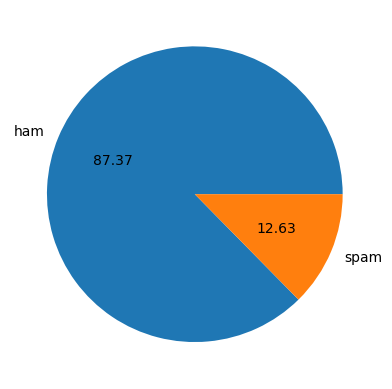

In [16]:
#Data Visualization
plt.pie(df["output"].value_counts(),autopct="%.2f", labels = ["ham", "spam"])

In [17]:
#Since,data is imbalanced

In [18]:
#Feature Engineering
df["characters"]= df["input"].apply(len)

In [19]:
df["words"]=df["input"].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df["sentences"]=df["input"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,output,input,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


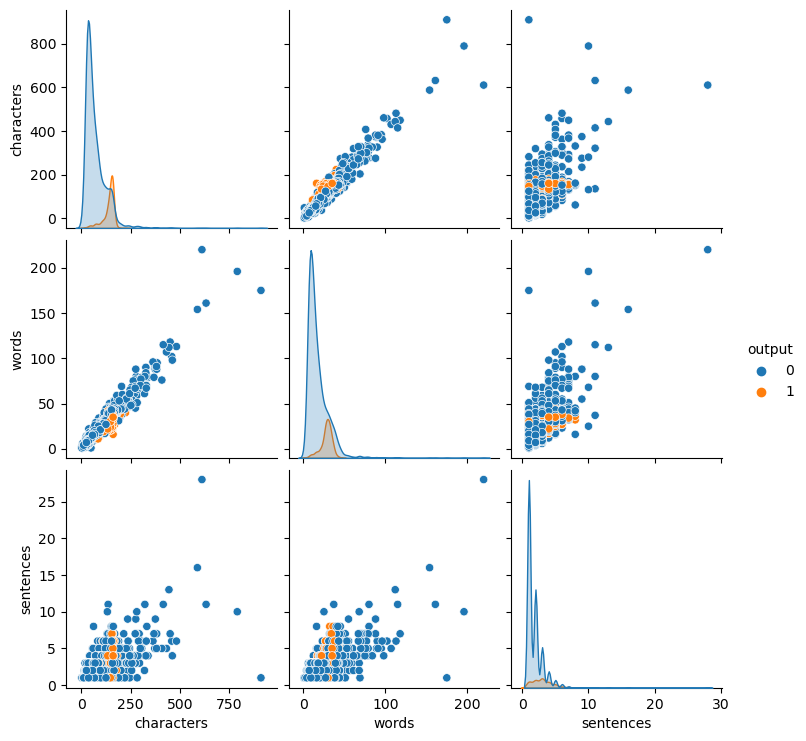

In [22]:
#pairplot
sns.pairplot(df, hue="output")

In [23]:
#heatmap
df.corr()

,output,characters,words,sentences
output,1.000000,0.384717,0.262984,0.284901
characters,0.384717,1.000000,0.965770,0.638143
words,0.262984,0.965770,1.000000,0.684541
sentences,0.284901,0.638143,0.684541,1.000000


<Axes: >

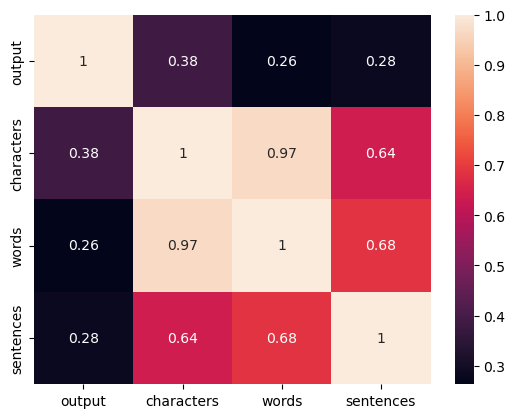

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
#using porterstemmer
ps = PorterStemmer()

In [26]:
def data(text):
    text = text.lower()                        #convert text to lowercase
    text = nltk.word_tokenize(text)            #text to words
    
    y = []
    for i in text:
        if i.isalnum():                        #remove special char
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                             #removing stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                             #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y)

In [27]:
df.sample(2)

,output,input,characters,words,sentences
721,0,S'fine. Anytime. All the best with it.,38,10,3
169,0,Yes :)it completely in out of form:)clark also...,59,16,1


In [28]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)

In [ ]:
#Vectorization

In [29]:
#Initialising TFIDF Vectorizer
tfidv=TfidfVectorizer(max_features=3000)

In [30]:
y=df["output"].values

In [31]:
x=X = tfidv.fit_transform(df["new_data"]).toarray()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
# Model training
models={
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
}

In [34]:
# Creating a function train each model and calculate accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    return acc, pre

In [36]:
from sklearn.metrics import precision_score

In [37]:
# for loop Calls "train_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)

    acc_s.append(accuracy)
    pre_s.append(precision)

In [38]:
# As Precision>Accuracy for this Data, Sorting in descending order of Precision
scores_df = pd.DataFrame({"Algorithm": models.keys(),
                          "Accuracy": acc_s,
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

In [39]:
print(scores_df)

             Algorithm  Accuracy  Precision
0  Logistic Regression  0.956480   0.979381
1        Decision Tree  0.943907   0.794118
